# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

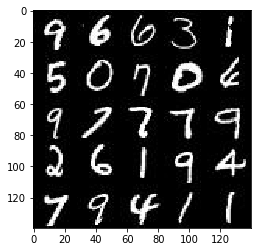

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

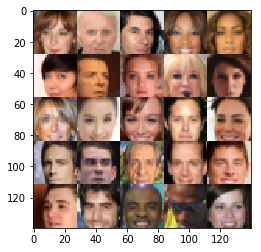

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

/home/paperspace/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.7.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [13]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    input_real = tf.placeholder(tf.float32, shape=(None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, shape=(None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32)

    return input_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False, alpha = 0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        
        # in 28x28x3 (1 in mnist)
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        #no batchnorm here
        relu1 = tf.maximum(alpha * x1, x1)
        # outs 14x14x64

        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # outs 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # outs 4x4x256
        
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        #print(relu3.shape)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True, alpha = 0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=(not is_train)):
        x1 = tf.layers.dense(z, 7*7*256)
        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        #outs 7x7x256
        
        x2 = tf.layers.conv2d_transpose(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        #outs 14x14x128
        
        x3 = tf.layers.conv2d_transpose(x2, 64, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        #outs 28x28x64
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same')

        out = tf.tanh(logits)
        #print ('output shape:',out.shape)

    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim, alpha = 0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))

    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
        
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [22]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, 
          get_batches, data_shape, data_image_mode, print_every=10, show_every=100):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    samples = []
    losses = []
    steps = 0  
    #image_channels = 3 if data_image_mode == 'RGB' else 1
    
    input_real, input_z, lr = model_inputs(data_shape[1],
                                           data_shape[2],
                                           data_shape[3],
                                           z_dim)
    
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                                           
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    print("Epoch {}/{}...".format(epoch_i + 1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)
                                           

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.4230... Generator Loss: 1.4794
Epoch 1/2... Discriminator Loss: 1.5341... Generator Loss: 0.3384
Epoch 1/2... Discriminator Loss: 1.3787... Generator Loss: 0.8651
Epoch 1/2... Discriminator Loss: 1.6173... Generator Loss: 0.3900
Epoch 1/2... Discriminator Loss: 1.0427... Generator Loss: 0.7491
Epoch 1/2... Discriminator Loss: 1.3396... Generator Loss: 1.1238
Epoch 1/2... Discriminator Loss: 1.0621... Generator Loss: 0.7905
Epoch 1/2... Discriminator Loss: 1.1429... Generator Loss: 1.7963
Epoch 1/2... Discriminator Loss: 1.2303... Generator Loss: 0.6009
Epoch 1/2... Discriminator Loss: 1.1772... Generator Loss: 0.5134


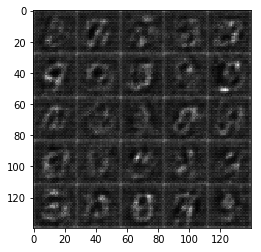

Epoch 1/2... Discriminator Loss: 1.1707... Generator Loss: 1.1582
Epoch 1/2... Discriminator Loss: 1.0844... Generator Loss: 1.0961
Epoch 1/2... Discriminator Loss: 1.0815... Generator Loss: 0.7208
Epoch 1/2... Discriminator Loss: 1.2076... Generator Loss: 0.6036
Epoch 1/2... Discriminator Loss: 1.0399... Generator Loss: 1.2963
Epoch 1/2... Discriminator Loss: 0.8589... Generator Loss: 1.3577
Epoch 1/2... Discriminator Loss: 0.9382... Generator Loss: 1.3547
Epoch 1/2... Discriminator Loss: 1.0294... Generator Loss: 0.6177
Epoch 1/2... Discriminator Loss: 0.7689... Generator Loss: 1.3917
Epoch 1/2... Discriminator Loss: 0.8144... Generator Loss: 0.9687


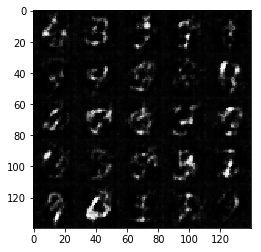

Epoch 1/2... Discriminator Loss: 1.0559... Generator Loss: 0.6305
Epoch 1/2... Discriminator Loss: 0.8395... Generator Loss: 1.9248
Epoch 1/2... Discriminator Loss: 0.8620... Generator Loss: 0.7653
Epoch 1/2... Discriminator Loss: 0.6391... Generator Loss: 1.7005
Epoch 1/2... Discriminator Loss: 0.7057... Generator Loss: 1.0424
Epoch 1/2... Discriminator Loss: 1.0369... Generator Loss: 0.5805
Epoch 1/2... Discriminator Loss: 0.8691... Generator Loss: 0.7533
Epoch 1/2... Discriminator Loss: 1.1046... Generator Loss: 2.9463
Epoch 1/2... Discriminator Loss: 0.6080... Generator Loss: 1.1826
Epoch 1/2... Discriminator Loss: 0.7408... Generator Loss: 0.9568


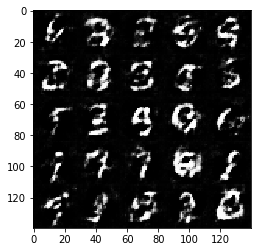

Epoch 1/2... Discriminator Loss: 0.6201... Generator Loss: 1.1407
Epoch 1/2... Discriminator Loss: 1.7877... Generator Loss: 0.2385
Epoch 1/2... Discriminator Loss: 0.6363... Generator Loss: 1.1922
Epoch 1/2... Discriminator Loss: 0.5923... Generator Loss: 1.3379
Epoch 1/2... Discriminator Loss: 0.6944... Generator Loss: 1.9272
Epoch 1/2... Discriminator Loss: 1.0757... Generator Loss: 0.6058
Epoch 1/2... Discriminator Loss: 1.6512... Generator Loss: 0.3138
Epoch 1/2... Discriminator Loss: 1.0145... Generator Loss: 1.8779
Epoch 1/2... Discriminator Loss: 0.9725... Generator Loss: 0.7414
Epoch 1/2... Discriminator Loss: 0.9017... Generator Loss: 0.8710


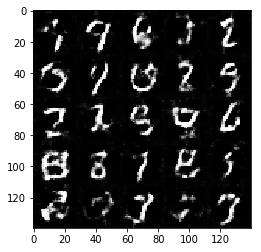

Epoch 1/2... Discriminator Loss: 0.8849... Generator Loss: 0.8451
Epoch 1/2... Discriminator Loss: 0.8758... Generator Loss: 1.2217
Epoch 1/2... Discriminator Loss: 1.0825... Generator Loss: 0.5761
Epoch 1/2... Discriminator Loss: 0.9032... Generator Loss: 2.4297
Epoch 1/2... Discriminator Loss: 1.2606... Generator Loss: 0.4290
Epoch 1/2... Discriminator Loss: 1.0163... Generator Loss: 0.6626
Epoch 1/2... Discriminator Loss: 1.0048... Generator Loss: 0.7710
Epoch 1/2... Discriminator Loss: 0.9075... Generator Loss: 0.8159
Epoch 1/2... Discriminator Loss: 1.1172... Generator Loss: 2.2045
Epoch 1/2... Discriminator Loss: 0.9955... Generator Loss: 0.6467


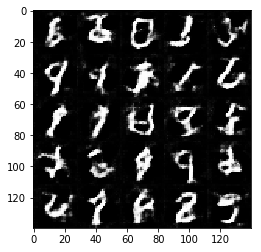

Epoch 1/2... Discriminator Loss: 0.9740... Generator Loss: 0.6135
Epoch 1/2... Discriminator Loss: 0.7772... Generator Loss: 1.6840
Epoch 1/2... Discriminator Loss: 0.9328... Generator Loss: 0.8966
Epoch 1/2... Discriminator Loss: 0.8325... Generator Loss: 1.5260
Epoch 1/2... Discriminator Loss: 0.8048... Generator Loss: 0.8923
Epoch 1/2... Discriminator Loss: 1.0364... Generator Loss: 0.6223
Epoch 1/2... Discriminator Loss: 0.8195... Generator Loss: 1.3243
Epoch 1/2... Discriminator Loss: 1.1037... Generator Loss: 2.0498
Epoch 1/2... Discriminator Loss: 0.8760... Generator Loss: 0.8187
Epoch 1/2... Discriminator Loss: 0.8974... Generator Loss: 0.9458


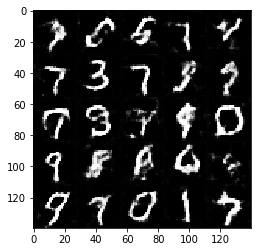

Epoch 1/2... Discriminator Loss: 0.8585... Generator Loss: 1.3600
Epoch 1/2... Discriminator Loss: 0.8227... Generator Loss: 1.0811
Epoch 1/2... Discriminator Loss: 0.8579... Generator Loss: 0.9706
Epoch 1/2... Discriminator Loss: 0.8575... Generator Loss: 1.0926
Epoch 1/2... Discriminator Loss: 0.8777... Generator Loss: 0.9314
Epoch 1/2... Discriminator Loss: 0.8167... Generator Loss: 1.4747
Epoch 1/2... Discriminator Loss: 0.9068... Generator Loss: 1.1129
Epoch 1/2... Discriminator Loss: 0.8673... Generator Loss: 0.8155
Epoch 1/2... Discriminator Loss: 1.1995... Generator Loss: 2.0252
Epoch 1/2... Discriminator Loss: 0.8656... Generator Loss: 1.0448


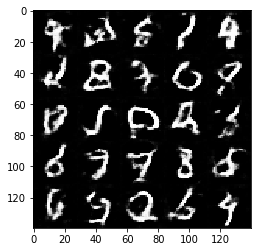

Epoch 1/2... Discriminator Loss: 0.8721... Generator Loss: 0.8756
Epoch 1/2... Discriminator Loss: 1.5178... Generator Loss: 0.3123
Epoch 1/2... Discriminator Loss: 1.0752... Generator Loss: 0.6089
Epoch 1/2... Discriminator Loss: 0.8255... Generator Loss: 1.3013
Epoch 1/2... Discriminator Loss: 0.8856... Generator Loss: 1.6248
Epoch 1/2... Discriminator Loss: 0.6853... Generator Loss: 1.1799
Epoch 1/2... Discriminator Loss: 0.8467... Generator Loss: 1.0286
Epoch 1/2... Discriminator Loss: 0.8121... Generator Loss: 1.1528
Epoch 1/2... Discriminator Loss: 1.0477... Generator Loss: 0.6115
Epoch 1/2... Discriminator Loss: 0.6880... Generator Loss: 1.4748


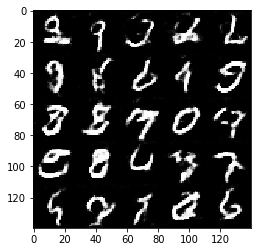

Epoch 1/2... Discriminator Loss: 0.7820... Generator Loss: 0.8569
Epoch 1/2... Discriminator Loss: 0.6699... Generator Loss: 1.0826
Epoch 1/2... Discriminator Loss: 0.6111... Generator Loss: 1.7802
Epoch 1/2... Discriminator Loss: 0.6693... Generator Loss: 1.0027
Epoch 1/2... Discriminator Loss: 0.9415... Generator Loss: 0.8458
Epoch 1/2... Discriminator Loss: 0.7334... Generator Loss: 0.9771
Epoch 1/2... Discriminator Loss: 0.6589... Generator Loss: 1.1625
Epoch 1/2... Discriminator Loss: 0.8200... Generator Loss: 0.8503
Epoch 1/2... Discriminator Loss: 1.0469... Generator Loss: 0.5594
Epoch 1/2... Discriminator Loss: 0.7977... Generator Loss: 0.8715


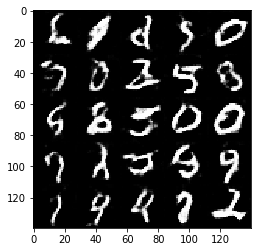

Epoch 1/2... Discriminator Loss: 1.2306... Generator Loss: 0.5123
Epoch 1/2... Discriminator Loss: 0.6670... Generator Loss: 1.1398
Epoch 1/2... Discriminator Loss: 0.8093... Generator Loss: 0.8601
Epoch 2/2... Discriminator Loss: 0.7524... Generator Loss: 0.8899
Epoch 2/2... Discriminator Loss: 0.6537... Generator Loss: 1.0807
Epoch 2/2... Discriminator Loss: 0.9289... Generator Loss: 0.6809
Epoch 2/2... Discriminator Loss: 3.9324... Generator Loss: 0.0321
Epoch 2/2... Discriminator Loss: 0.6463... Generator Loss: 1.2195
Epoch 2/2... Discriminator Loss: 0.7976... Generator Loss: 0.8418
Epoch 2/2... Discriminator Loss: 0.6659... Generator Loss: 1.1423


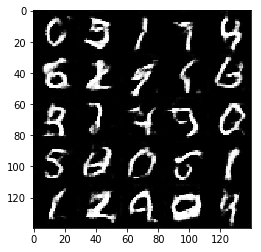

Epoch 2/2... Discriminator Loss: 0.6747... Generator Loss: 1.0312
Epoch 2/2... Discriminator Loss: 0.6585... Generator Loss: 1.0872
Epoch 2/2... Discriminator Loss: 0.6255... Generator Loss: 2.0304
Epoch 2/2... Discriminator Loss: 0.9267... Generator Loss: 0.8429
Epoch 2/2... Discriminator Loss: 0.8768... Generator Loss: 1.8437
Epoch 2/2... Discriminator Loss: 0.7587... Generator Loss: 0.9648
Epoch 2/2... Discriminator Loss: 0.7295... Generator Loss: 1.0013
Epoch 2/2... Discriminator Loss: 0.7191... Generator Loss: 0.9083
Epoch 2/2... Discriminator Loss: 0.6266... Generator Loss: 1.0081
Epoch 2/2... Discriminator Loss: 1.2980... Generator Loss: 0.4044


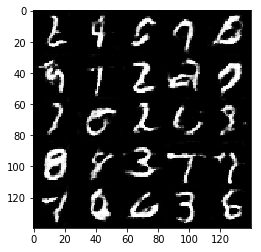

Epoch 2/2... Discriminator Loss: 0.7365... Generator Loss: 0.9241
Epoch 2/2... Discriminator Loss: 0.6072... Generator Loss: 1.1722
Epoch 2/2... Discriminator Loss: 1.3222... Generator Loss: 0.4282
Epoch 2/2... Discriminator Loss: 0.9157... Generator Loss: 0.9044
Epoch 2/2... Discriminator Loss: 0.9083... Generator Loss: 0.7325
Epoch 2/2... Discriminator Loss: 0.7072... Generator Loss: 0.9595
Epoch 2/2... Discriminator Loss: 0.6039... Generator Loss: 1.1804
Epoch 2/2... Discriminator Loss: 0.9822... Generator Loss: 0.6626
Epoch 2/2... Discriminator Loss: 0.7938... Generator Loss: 1.0397
Epoch 2/2... Discriminator Loss: 0.8648... Generator Loss: 0.7741


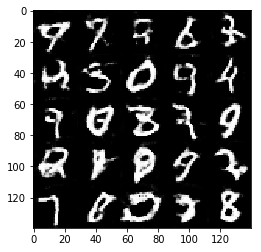

Epoch 2/2... Discriminator Loss: 0.6493... Generator Loss: 1.2324
Epoch 2/2... Discriminator Loss: 1.6466... Generator Loss: 0.3345
Epoch 2/2... Discriminator Loss: 0.9352... Generator Loss: 1.4069
Epoch 2/2... Discriminator Loss: 0.8161... Generator Loss: 1.2792
Epoch 2/2... Discriminator Loss: 0.8023... Generator Loss: 1.2560
Epoch 2/2... Discriminator Loss: 0.8398... Generator Loss: 0.8777
Epoch 2/2... Discriminator Loss: 0.6433... Generator Loss: 1.0267
Epoch 2/2... Discriminator Loss: 0.6838... Generator Loss: 0.9999
Epoch 2/2... Discriminator Loss: 0.7262... Generator Loss: 1.1044
Epoch 2/2... Discriminator Loss: 1.0351... Generator Loss: 0.5603


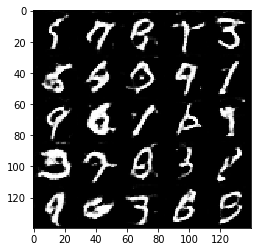

Epoch 2/2... Discriminator Loss: 1.0514... Generator Loss: 0.7864
Epoch 2/2... Discriminator Loss: 0.9868... Generator Loss: 0.7213
Epoch 2/2... Discriminator Loss: 0.4623... Generator Loss: 1.8394
Epoch 2/2... Discriminator Loss: 0.6461... Generator Loss: 1.6090
Epoch 2/2... Discriminator Loss: 0.8573... Generator Loss: 0.7667
Epoch 2/2... Discriminator Loss: 0.6443... Generator Loss: 1.6528
Epoch 2/2... Discriminator Loss: 0.8873... Generator Loss: 0.8084
Epoch 2/2... Discriminator Loss: 0.5381... Generator Loss: 1.4428
Epoch 2/2... Discriminator Loss: 0.9927... Generator Loss: 0.6781
Epoch 2/2... Discriminator Loss: 0.7852... Generator Loss: 1.1973


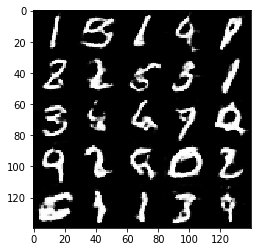

Epoch 2/2... Discriminator Loss: 1.1808... Generator Loss: 0.5308
Epoch 2/2... Discriminator Loss: 0.7645... Generator Loss: 1.0680
Epoch 2/2... Discriminator Loss: 0.6737... Generator Loss: 1.0653
Epoch 2/2... Discriminator Loss: 0.7830... Generator Loss: 0.9410
Epoch 2/2... Discriminator Loss: 0.7911... Generator Loss: 1.0050
Epoch 2/2... Discriminator Loss: 0.9063... Generator Loss: 0.8179
Epoch 2/2... Discriminator Loss: 0.7194... Generator Loss: 1.0673
Epoch 2/2... Discriminator Loss: 1.3277... Generator Loss: 0.4502
Epoch 2/2... Discriminator Loss: 0.6468... Generator Loss: 1.1779
Epoch 2/2... Discriminator Loss: 0.6105... Generator Loss: 1.1769


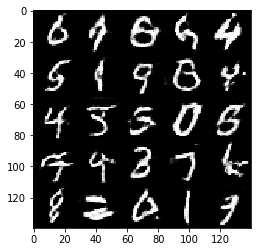

Epoch 2/2... Discriminator Loss: 0.9619... Generator Loss: 0.6948
Epoch 2/2... Discriminator Loss: 1.1225... Generator Loss: 0.5672
Epoch 2/2... Discriminator Loss: 1.5378... Generator Loss: 0.3486
Epoch 2/2... Discriminator Loss: 0.6792... Generator Loss: 1.1399
Epoch 2/2... Discriminator Loss: 0.6946... Generator Loss: 1.0788
Epoch 2/2... Discriminator Loss: 0.7212... Generator Loss: 2.2922
Epoch 2/2... Discriminator Loss: 0.5926... Generator Loss: 1.2497
Epoch 2/2... Discriminator Loss: 0.8765... Generator Loss: 0.7532
Epoch 2/2... Discriminator Loss: 0.6586... Generator Loss: 1.1301
Epoch 2/2... Discriminator Loss: 0.8921... Generator Loss: 0.7665


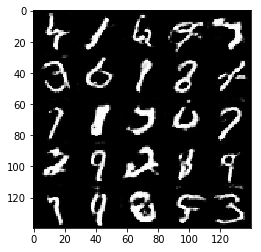

Epoch 2/2... Discriminator Loss: 0.7932... Generator Loss: 1.4640
Epoch 2/2... Discriminator Loss: 1.1219... Generator Loss: 0.5587
Epoch 2/2... Discriminator Loss: 1.2147... Generator Loss: 0.4769
Epoch 2/2... Discriminator Loss: 1.2031... Generator Loss: 0.4777
Epoch 2/2... Discriminator Loss: 0.5932... Generator Loss: 1.1263
Epoch 2/2... Discriminator Loss: 1.2537... Generator Loss: 0.4682
Epoch 2/2... Discriminator Loss: 0.8811... Generator Loss: 1.4933
Epoch 2/2... Discriminator Loss: 0.7851... Generator Loss: 1.1298
Epoch 2/2... Discriminator Loss: 1.2124... Generator Loss: 0.5154
Epoch 2/2... Discriminator Loss: 0.6223... Generator Loss: 1.2927


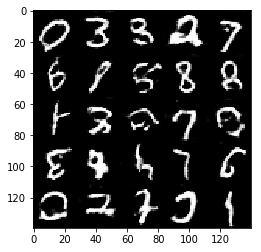

Epoch 2/2... Discriminator Loss: 0.8082... Generator Loss: 0.9118
Epoch 2/2... Discriminator Loss: 0.8084... Generator Loss: 0.8633
Epoch 2/2... Discriminator Loss: 0.5134... Generator Loss: 1.3564
Epoch 2/2... Discriminator Loss: 1.7549... Generator Loss: 0.2955
Epoch 2/2... Discriminator Loss: 0.8747... Generator Loss: 2.0003
Epoch 2/2... Discriminator Loss: 0.7251... Generator Loss: 1.2818
Epoch 2/2... Discriminator Loss: 0.7907... Generator Loss: 0.8246
Epoch 2/2... Discriminator Loss: 0.4655... Generator Loss: 1.7243
Epoch 2/2... Discriminator Loss: 1.0197... Generator Loss: 0.5844
Epoch 2/2... Discriminator Loss: 0.6192... Generator Loss: 1.1337


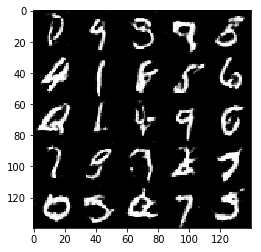

Epoch 2/2... Discriminator Loss: 0.6448... Generator Loss: 1.0331
Epoch 2/2... Discriminator Loss: 0.7840... Generator Loss: 1.7693
Epoch 2/2... Discriminator Loss: 0.6050... Generator Loss: 2.1643
Epoch 2/2... Discriminator Loss: 0.8254... Generator Loss: 0.7643
Epoch 2/2... Discriminator Loss: 0.9598... Generator Loss: 0.6431
Epoch 2/2... Discriminator Loss: 1.0351... Generator Loss: 2.6768
Epoch 2/2... Discriminator Loss: 0.7407... Generator Loss: 2.1003


In [23]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.4329... Generator Loss: 1.5639
Epoch 1/1... Discriminator Loss: 0.2464... Generator Loss: 2.5006
Epoch 1/1... Discriminator Loss: 0.1574... Generator Loss: 2.9841
Epoch 1/1... Discriminator Loss: 0.2548... Generator Loss: 2.1793
Epoch 1/1... Discriminator Loss: 1.0896... Generator Loss: 0.8689
Epoch 1/1... Discriminator Loss: 0.4706... Generator Loss: 2.9784
Epoch 1/1... Discriminator Loss: 1.2566... Generator Loss: 4.3282
Epoch 1/1... Discriminator Loss: 0.8913... Generator Loss: 1.0672
Epoch 1/1... Discriminator Loss: 0.6156... Generator Loss: 2.2591
Epoch 1/1... Discriminator Loss: 0.9258... Generator Loss: 0.8794


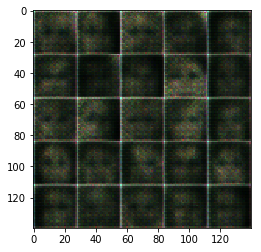

Epoch 1/1... Discriminator Loss: 1.0312... Generator Loss: 0.7019
Epoch 1/1... Discriminator Loss: 0.9688... Generator Loss: 0.7040
Epoch 1/1... Discriminator Loss: 1.1266... Generator Loss: 1.6711
Epoch 1/1... Discriminator Loss: 0.9800... Generator Loss: 1.2152
Epoch 1/1... Discriminator Loss: 0.6769... Generator Loss: 1.4975
Epoch 1/1... Discriminator Loss: 1.0057... Generator Loss: 1.0530
Epoch 1/1... Discriminator Loss: 0.5242... Generator Loss: 1.6326
Epoch 1/1... Discriminator Loss: 1.0474... Generator Loss: 2.2635
Epoch 1/1... Discriminator Loss: 0.8584... Generator Loss: 1.5136
Epoch 1/1... Discriminator Loss: 0.4827... Generator Loss: 2.2464


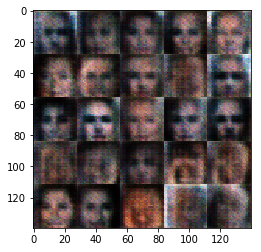

Epoch 1/1... Discriminator Loss: 0.8113... Generator Loss: 1.0473
Epoch 1/1... Discriminator Loss: 0.5835... Generator Loss: 1.2017
Epoch 1/1... Discriminator Loss: 1.1419... Generator Loss: 0.7270
Epoch 1/1... Discriminator Loss: 0.7071... Generator Loss: 1.2644
Epoch 1/1... Discriminator Loss: 1.1995... Generator Loss: 0.6333
Epoch 1/1... Discriminator Loss: 0.6141... Generator Loss: 2.0319
Epoch 1/1... Discriminator Loss: 0.7675... Generator Loss: 1.0635
Epoch 1/1... Discriminator Loss: 0.8311... Generator Loss: 1.0889
Epoch 1/1... Discriminator Loss: 0.4420... Generator Loss: 1.8579
Epoch 1/1... Discriminator Loss: 0.5121... Generator Loss: 1.8416


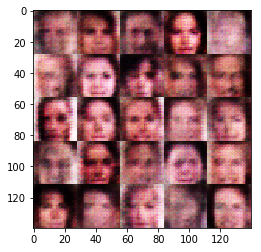

Epoch 1/1... Discriminator Loss: 0.3853... Generator Loss: 2.1607
Epoch 1/1... Discriminator Loss: 0.9156... Generator Loss: 0.8652
Epoch 1/1... Discriminator Loss: 1.3936... Generator Loss: 1.6898
Epoch 1/1... Discriminator Loss: 0.7698... Generator Loss: 1.5917
Epoch 1/1... Discriminator Loss: 0.7845... Generator Loss: 1.1058
Epoch 1/1... Discriminator Loss: 0.9239... Generator Loss: 1.2032
Epoch 1/1... Discriminator Loss: 1.1507... Generator Loss: 0.6103
Epoch 1/1... Discriminator Loss: 1.2369... Generator Loss: 0.6176
Epoch 1/1... Discriminator Loss: 1.0310... Generator Loss: 0.7033
Epoch 1/1... Discriminator Loss: 1.1096... Generator Loss: 1.2239


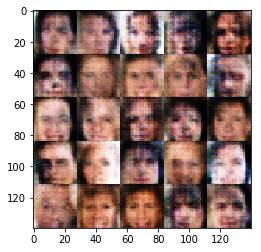

Epoch 1/1... Discriminator Loss: 0.8708... Generator Loss: 1.1391
Epoch 1/1... Discriminator Loss: 1.3593... Generator Loss: 0.5530
Epoch 1/1... Discriminator Loss: 1.0583... Generator Loss: 1.0682
Epoch 1/1... Discriminator Loss: 1.2782... Generator Loss: 0.6060
Epoch 1/1... Discriminator Loss: 1.0386... Generator Loss: 1.9130
Epoch 1/1... Discriminator Loss: 0.9459... Generator Loss: 1.0667
Epoch 1/1... Discriminator Loss: 0.9354... Generator Loss: 1.1560
Epoch 1/1... Discriminator Loss: 0.9506... Generator Loss: 1.3410
Epoch 1/1... Discriminator Loss: 0.8752... Generator Loss: 1.1712
Epoch 1/1... Discriminator Loss: 0.9046... Generator Loss: 1.0483


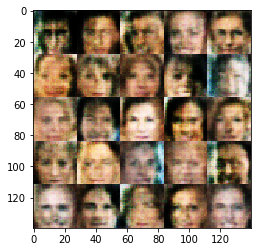

Epoch 1/1... Discriminator Loss: 1.0810... Generator Loss: 1.6342
Epoch 1/1... Discriminator Loss: 1.5492... Generator Loss: 0.3865
Epoch 1/1... Discriminator Loss: 1.2477... Generator Loss: 1.1760
Epoch 1/1... Discriminator Loss: 1.0060... Generator Loss: 1.0446
Epoch 1/1... Discriminator Loss: 1.0978... Generator Loss: 0.6404
Epoch 1/1... Discriminator Loss: 1.0238... Generator Loss: 1.3531
Epoch 1/1... Discriminator Loss: 1.0761... Generator Loss: 0.7369
Epoch 1/1... Discriminator Loss: 1.0621... Generator Loss: 0.7493
Epoch 1/1... Discriminator Loss: 1.1892... Generator Loss: 0.5831
Epoch 1/1... Discriminator Loss: 0.5357... Generator Loss: 1.5249


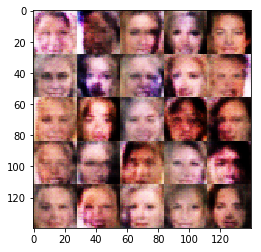

Epoch 1/1... Discriminator Loss: 1.5059... Generator Loss: 0.3486
Epoch 1/1... Discriminator Loss: 0.6520... Generator Loss: 1.9101
Epoch 1/1... Discriminator Loss: 0.9503... Generator Loss: 1.0924
Epoch 1/1... Discriminator Loss: 0.5624... Generator Loss: 1.7195
Epoch 1/1... Discriminator Loss: 1.2214... Generator Loss: 5.2388
Epoch 1/1... Discriminator Loss: 0.6579... Generator Loss: 4.3077
Epoch 1/1... Discriminator Loss: 0.6661... Generator Loss: 1.4721
Epoch 1/1... Discriminator Loss: 0.7389... Generator Loss: 1.1003
Epoch 1/1... Discriminator Loss: 1.0888... Generator Loss: 0.6243
Epoch 1/1... Discriminator Loss: 0.8990... Generator Loss: 2.1421


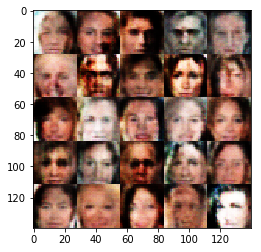

Epoch 1/1... Discriminator Loss: 0.5897... Generator Loss: 1.4110
Epoch 1/1... Discriminator Loss: 2.2672... Generator Loss: 0.1488
Epoch 1/1... Discriminator Loss: 0.8011... Generator Loss: 3.3016
Epoch 1/1... Discriminator Loss: 1.2039... Generator Loss: 0.4729
Epoch 1/1... Discriminator Loss: 0.3585... Generator Loss: 1.6094
Epoch 1/1... Discriminator Loss: 0.8842... Generator Loss: 0.8102
Epoch 1/1... Discriminator Loss: 0.8314... Generator Loss: 0.7128
Epoch 1/1... Discriminator Loss: 0.8075... Generator Loss: 2.8896
Epoch 1/1... Discriminator Loss: 0.2961... Generator Loss: 4.9888
Epoch 1/1... Discriminator Loss: 0.3591... Generator Loss: 2.7384


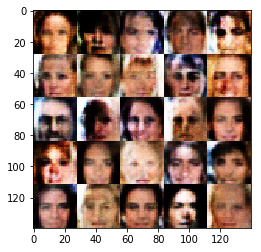

Epoch 1/1... Discriminator Loss: 0.3396... Generator Loss: 2.4797
Epoch 1/1... Discriminator Loss: 0.1592... Generator Loss: 2.5031
Epoch 1/1... Discriminator Loss: 0.6772... Generator Loss: 0.8446
Epoch 1/1... Discriminator Loss: 1.4026... Generator Loss: 6.2282
Epoch 1/1... Discriminator Loss: 0.4214... Generator Loss: 1.3793
Epoch 1/1... Discriminator Loss: 0.3463... Generator Loss: 1.4944
Epoch 1/1... Discriminator Loss: 0.2488... Generator Loss: 3.7380
Epoch 1/1... Discriminator Loss: 0.7430... Generator Loss: 0.9013
Epoch 1/1... Discriminator Loss: 0.2820... Generator Loss: 3.6472
Epoch 1/1... Discriminator Loss: 0.5139... Generator Loss: 1.5405


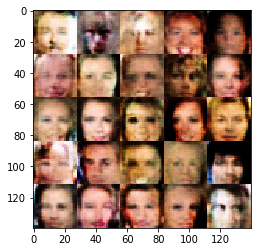

Epoch 1/1... Discriminator Loss: 0.1242... Generator Loss: 2.7853
Epoch 1/1... Discriminator Loss: 0.5589... Generator Loss: 5.0710
Epoch 1/1... Discriminator Loss: 0.2166... Generator Loss: 4.4190
Epoch 1/1... Discriminator Loss: 0.3556... Generator Loss: 2.2333
Epoch 1/1... Discriminator Loss: 0.7623... Generator Loss: 0.7907
Epoch 1/1... Discriminator Loss: 0.3994... Generator Loss: 1.4144
Epoch 1/1... Discriminator Loss: 0.6187... Generator Loss: 1.0644
Epoch 1/1... Discriminator Loss: 0.2020... Generator Loss: 2.2646
Epoch 1/1... Discriminator Loss: 0.2153... Generator Loss: 2.2833
Epoch 1/1... Discriminator Loss: 0.7559... Generator Loss: 0.9172


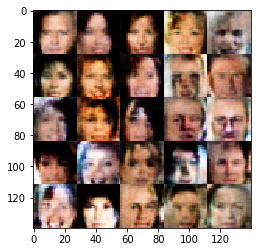

Epoch 1/1... Discriminator Loss: 0.6565... Generator Loss: 0.9701
Epoch 1/1... Discriminator Loss: 0.3201... Generator Loss: 2.8031
Epoch 1/1... Discriminator Loss: 0.8497... Generator Loss: 1.8773
Epoch 1/1... Discriminator Loss: 0.2704... Generator Loss: 3.0310
Epoch 1/1... Discriminator Loss: 0.2787... Generator Loss: 2.3623
Epoch 1/1... Discriminator Loss: 0.4407... Generator Loss: 1.4826
Epoch 1/1... Discriminator Loss: 0.6705... Generator Loss: 0.9909
Epoch 1/1... Discriminator Loss: 0.8194... Generator Loss: 0.7908
Epoch 1/1... Discriminator Loss: 0.3032... Generator Loss: 3.8441
Epoch 1/1... Discriminator Loss: 0.2973... Generator Loss: 1.7571


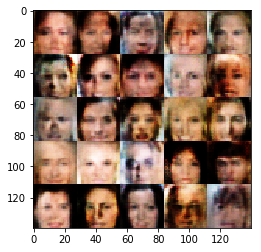

Epoch 1/1... Discriminator Loss: 0.1540... Generator Loss: 3.7383
Epoch 1/1... Discriminator Loss: 0.2802... Generator Loss: 1.8048
Epoch 1/1... Discriminator Loss: 0.3782... Generator Loss: 3.5637
Epoch 1/1... Discriminator Loss: 0.3386... Generator Loss: 2.5094
Epoch 1/1... Discriminator Loss: 0.2911... Generator Loss: 2.7331
Epoch 1/1... Discriminator Loss: 0.4712... Generator Loss: 3.3375
Epoch 1/1... Discriminator Loss: 0.6174... Generator Loss: 1.1299
Epoch 1/1... Discriminator Loss: 0.4664... Generator Loss: 1.4722
Epoch 1/1... Discriminator Loss: 0.4814... Generator Loss: 1.9692
Epoch 1/1... Discriminator Loss: 0.3277... Generator Loss: 1.8331


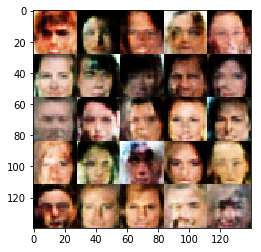

Epoch 1/1... Discriminator Loss: 0.1936... Generator Loss: 3.7971
Epoch 1/1... Discriminator Loss: 0.2268... Generator Loss: 4.3051
Epoch 1/1... Discriminator Loss: 0.4472... Generator Loss: 1.3952
Epoch 1/1... Discriminator Loss: 0.3289... Generator Loss: 2.0256
Epoch 1/1... Discriminator Loss: 0.1792... Generator Loss: 2.7129
Epoch 1/1... Discriminator Loss: 0.5160... Generator Loss: 1.3530
Epoch 1/1... Discriminator Loss: 1.1570... Generator Loss: 0.4952
Epoch 1/1... Discriminator Loss: 0.2030... Generator Loss: 2.1973
Epoch 1/1... Discriminator Loss: 0.1990... Generator Loss: 3.6206
Epoch 1/1... Discriminator Loss: 0.6542... Generator Loss: 2.1435


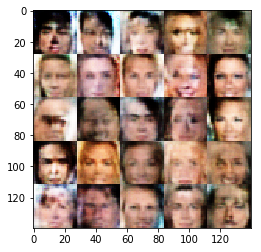

Epoch 1/1... Discriminator Loss: 0.2160... Generator Loss: 3.6907
Epoch 1/1... Discriminator Loss: 0.2036... Generator Loss: 2.7778
Epoch 1/1... Discriminator Loss: 0.3138... Generator Loss: 1.8367
Epoch 1/1... Discriminator Loss: 0.3003... Generator Loss: 1.9441
Epoch 1/1... Discriminator Loss: 0.1158... Generator Loss: 3.3948
Epoch 1/1... Discriminator Loss: 0.2307... Generator Loss: 2.5005
Epoch 1/1... Discriminator Loss: 0.1805... Generator Loss: 2.5520
Epoch 1/1... Discriminator Loss: 1.1789... Generator Loss: 2.5081
Epoch 1/1... Discriminator Loss: 2.3524... Generator Loss: 0.1429
Epoch 1/1... Discriminator Loss: 0.2975... Generator Loss: 2.3732


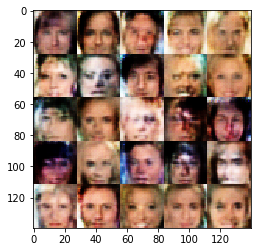

Epoch 1/1... Discriminator Loss: 0.2508... Generator Loss: 2.5123
Epoch 1/1... Discriminator Loss: 0.8772... Generator Loss: 0.6883
Epoch 1/1... Discriminator Loss: 0.6491... Generator Loss: 0.9965
Epoch 1/1... Discriminator Loss: 0.2545... Generator Loss: 2.2883
Epoch 1/1... Discriminator Loss: 0.2656... Generator Loss: 2.6448
Epoch 1/1... Discriminator Loss: 0.2312... Generator Loss: 2.0677
Epoch 1/1... Discriminator Loss: 0.2898... Generator Loss: 2.6157
Epoch 1/1... Discriminator Loss: 0.2604... Generator Loss: 3.5298
Epoch 1/1... Discriminator Loss: 0.1087... Generator Loss: 4.3687
Epoch 1/1... Discriminator Loss: 1.5639... Generator Loss: 0.3390


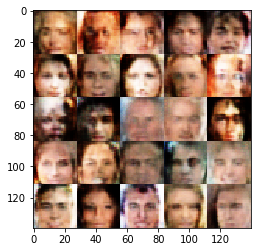

Epoch 1/1... Discriminator Loss: 0.1080... Generator Loss: 3.9754
Epoch 1/1... Discriminator Loss: 0.4719... Generator Loss: 1.8868
Epoch 1/1... Discriminator Loss: 0.4655... Generator Loss: 1.7932
Epoch 1/1... Discriminator Loss: 0.3004... Generator Loss: 1.8728
Epoch 1/1... Discriminator Loss: 0.1134... Generator Loss: 5.0874
Epoch 1/1... Discriminator Loss: 0.2382... Generator Loss: 2.2938
Epoch 1/1... Discriminator Loss: 0.2082... Generator Loss: 5.7450
Epoch 1/1... Discriminator Loss: 0.2913... Generator Loss: 2.1750
Epoch 1/1... Discriminator Loss: 0.1901... Generator Loss: 3.7534
Epoch 1/1... Discriminator Loss: 0.1394... Generator Loss: 3.1115


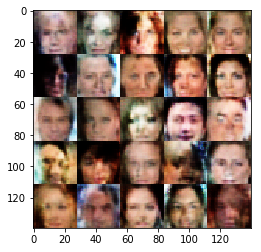

Epoch 1/1... Discriminator Loss: 0.1578... Generator Loss: 3.1763
Epoch 1/1... Discriminator Loss: 0.2139... Generator Loss: 4.2677
Epoch 1/1... Discriminator Loss: 0.2549... Generator Loss: 2.0876
Epoch 1/1... Discriminator Loss: 0.1613... Generator Loss: 4.2049
Epoch 1/1... Discriminator Loss: 0.4489... Generator Loss: 1.2431
Epoch 1/1... Discriminator Loss: 0.1721... Generator Loss: 3.1325
Epoch 1/1... Discriminator Loss: 0.4865... Generator Loss: 1.1478
Epoch 1/1... Discriminator Loss: 0.3787... Generator Loss: 1.5077
Epoch 1/1... Discriminator Loss: 0.1012... Generator Loss: 3.8176
Epoch 1/1... Discriminator Loss: 0.2210... Generator Loss: 2.5820


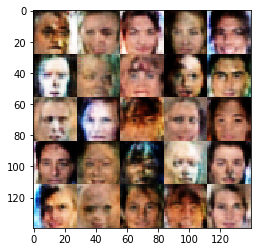

Epoch 1/1... Discriminator Loss: 0.3921... Generator Loss: 1.3163
Epoch 1/1... Discriminator Loss: 0.8051... Generator Loss: 0.8393
Epoch 1/1... Discriminator Loss: 0.8252... Generator Loss: 1.9915
Epoch 1/1... Discriminator Loss: 0.5340... Generator Loss: 1.3811
Epoch 1/1... Discriminator Loss: 1.2763... Generator Loss: 0.4450
Epoch 1/1... Discriminator Loss: 0.1674... Generator Loss: 2.7903
Epoch 1/1... Discriminator Loss: 0.3622... Generator Loss: 1.8736
Epoch 1/1... Discriminator Loss: 0.2280... Generator Loss: 2.0031
Epoch 1/1... Discriminator Loss: 0.2149... Generator Loss: 2.4972
Epoch 1/1... Discriminator Loss: 0.1366... Generator Loss: 2.9969


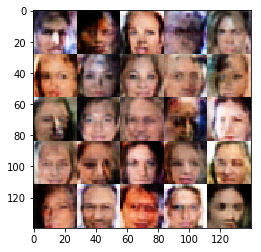

Epoch 1/1... Discriminator Loss: 0.3006... Generator Loss: 3.3454
Epoch 1/1... Discriminator Loss: 0.1908... Generator Loss: 3.2185
Epoch 1/1... Discriminator Loss: 0.0685... Generator Loss: 4.3577
Epoch 1/1... Discriminator Loss: 0.2207... Generator Loss: 2.5840
Epoch 1/1... Discriminator Loss: 0.2727... Generator Loss: 2.0724
Epoch 1/1... Discriminator Loss: 0.2810... Generator Loss: 1.8872
Epoch 1/1... Discriminator Loss: 0.4246... Generator Loss: 1.3533
Epoch 1/1... Discriminator Loss: 0.1272... Generator Loss: 4.0280
Epoch 1/1... Discriminator Loss: 0.2699... Generator Loss: 1.8588
Epoch 1/1... Discriminator Loss: 0.1086... Generator Loss: 4.3341


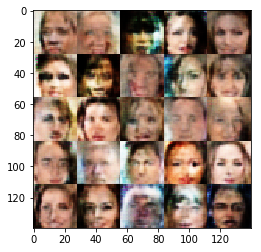

Epoch 1/1... Discriminator Loss: 0.1575... Generator Loss: 3.1262
Epoch 1/1... Discriminator Loss: 0.5422... Generator Loss: 1.0868
Epoch 1/1... Discriminator Loss: 2.0437... Generator Loss: 0.2339
Epoch 1/1... Discriminator Loss: 1.2619... Generator Loss: 0.5127
Epoch 1/1... Discriminator Loss: 0.4178... Generator Loss: 1.6049
Epoch 1/1... Discriminator Loss: 0.5813... Generator Loss: 1.1295
Epoch 1/1... Discriminator Loss: 0.2397... Generator Loss: 2.4211
Epoch 1/1... Discriminator Loss: 0.3603... Generator Loss: 1.8147
Epoch 1/1... Discriminator Loss: 0.7270... Generator Loss: 0.9058
Epoch 1/1... Discriminator Loss: 0.1231... Generator Loss: 3.8329


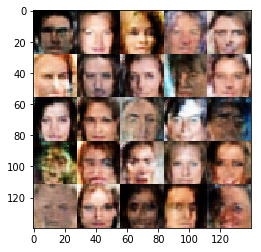

Epoch 1/1... Discriminator Loss: 0.4220... Generator Loss: 1.9777
Epoch 1/1... Discriminator Loss: 0.4700... Generator Loss: 1.2349
Epoch 1/1... Discriminator Loss: 0.1733... Generator Loss: 2.9073
Epoch 1/1... Discriminator Loss: 0.3331... Generator Loss: 1.6507
Epoch 1/1... Discriminator Loss: 0.3546... Generator Loss: 2.0343
Epoch 1/1... Discriminator Loss: 0.8062... Generator Loss: 0.8590
Epoch 1/1... Discriminator Loss: 0.3907... Generator Loss: 1.8211
Epoch 1/1... Discriminator Loss: 0.2496... Generator Loss: 1.9167
Epoch 1/1... Discriminator Loss: 0.1640... Generator Loss: 3.0616
Epoch 1/1... Discriminator Loss: 0.3194... Generator Loss: 1.7761


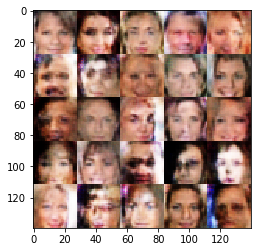

Epoch 1/1... Discriminator Loss: 0.4706... Generator Loss: 1.3551
Epoch 1/1... Discriminator Loss: 0.2475... Generator Loss: 2.2780
Epoch 1/1... Discriminator Loss: 0.2605... Generator Loss: 2.6692
Epoch 1/1... Discriminator Loss: 0.2797... Generator Loss: 1.8171
Epoch 1/1... Discriminator Loss: 0.5845... Generator Loss: 1.0255
Epoch 1/1... Discriminator Loss: 1.7673... Generator Loss: 0.3095
Epoch 1/1... Discriminator Loss: 1.2085... Generator Loss: 1.0479
Epoch 1/1... Discriminator Loss: 0.6518... Generator Loss: 2.5019
Epoch 1/1... Discriminator Loss: 0.7148... Generator Loss: 0.9671
Epoch 1/1... Discriminator Loss: 0.5632... Generator Loss: 1.2506


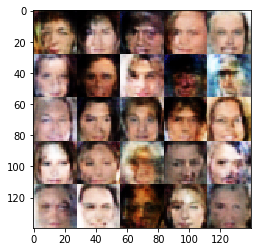

Epoch 1/1... Discriminator Loss: 1.3413... Generator Loss: 1.3637
Epoch 1/1... Discriminator Loss: 0.6045... Generator Loss: 1.0912
Epoch 1/1... Discriminator Loss: 0.6347... Generator Loss: 1.0392
Epoch 1/1... Discriminator Loss: 0.3455... Generator Loss: 1.8801
Epoch 1/1... Discriminator Loss: 0.4462... Generator Loss: 1.6810
Epoch 1/1... Discriminator Loss: 0.4848... Generator Loss: 1.2850
Epoch 1/1... Discriminator Loss: 0.0644... Generator Loss: 5.0343
Epoch 1/1... Discriminator Loss: 0.3883... Generator Loss: 1.6319
Epoch 1/1... Discriminator Loss: 0.2310... Generator Loss: 3.6432
Epoch 1/1... Discriminator Loss: 0.4030... Generator Loss: 1.5006


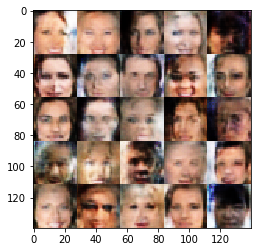

Epoch 1/1... Discriminator Loss: 0.4283... Generator Loss: 1.3423
Epoch 1/1... Discriminator Loss: 0.1068... Generator Loss: 3.3462
Epoch 1/1... Discriminator Loss: 0.3418... Generator Loss: 1.6512
Epoch 1/1... Discriminator Loss: 0.2912... Generator Loss: 2.1330
Epoch 1/1... Discriminator Loss: 0.3496... Generator Loss: 1.7922
Epoch 1/1... Discriminator Loss: 0.2320... Generator Loss: 2.0501
Epoch 1/1... Discriminator Loss: 0.4281... Generator Loss: 1.3121
Epoch 1/1... Discriminator Loss: 0.2694... Generator Loss: 3.3312
Epoch 1/1... Discriminator Loss: 0.0774... Generator Loss: 3.8499
Epoch 1/1... Discriminator Loss: 0.2716... Generator Loss: 3.0410


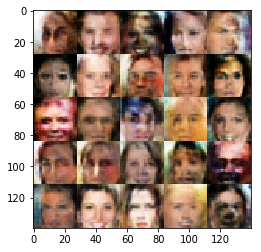

Epoch 1/1... Discriminator Loss: 0.2616... Generator Loss: 2.4189
Epoch 1/1... Discriminator Loss: 1.7759... Generator Loss: 2.3769
Epoch 1/1... Discriminator Loss: 0.9332... Generator Loss: 2.3623
Epoch 1/1... Discriminator Loss: 0.5369... Generator Loss: 2.7465
Epoch 1/1... Discriminator Loss: 0.6700... Generator Loss: 1.2275
Epoch 1/1... Discriminator Loss: 0.4414... Generator Loss: 2.1154
Epoch 1/1... Discriminator Loss: 1.1132... Generator Loss: 2.4747
Epoch 1/1... Discriminator Loss: 0.3841... Generator Loss: 3.1011
Epoch 1/1... Discriminator Loss: 0.4771... Generator Loss: 1.5397
Epoch 1/1... Discriminator Loss: 0.3742... Generator Loss: 1.6476


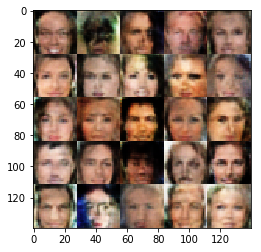

Epoch 1/1... Discriminator Loss: 0.2334... Generator Loss: 2.2960
Epoch 1/1... Discriminator Loss: 0.3415... Generator Loss: 1.8671
Epoch 1/1... Discriminator Loss: 0.2693... Generator Loss: 2.6505
Epoch 1/1... Discriminator Loss: 0.3288... Generator Loss: 2.4182
Epoch 1/1... Discriminator Loss: 0.1502... Generator Loss: 3.1992
Epoch 1/1... Discriminator Loss: 0.3009... Generator Loss: 1.7136
Epoch 1/1... Discriminator Loss: 0.1891... Generator Loss: 2.6943
Epoch 1/1... Discriminator Loss: 0.5773... Generator Loss: 2.4996
Epoch 1/1... Discriminator Loss: 0.2516... Generator Loss: 3.3572
Epoch 1/1... Discriminator Loss: 0.9043... Generator Loss: 2.2101


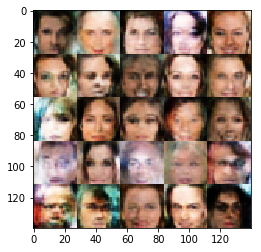

Epoch 1/1... Discriminator Loss: 0.3051... Generator Loss: 3.6374
Epoch 1/1... Discriminator Loss: 0.3685... Generator Loss: 1.8625
Epoch 1/1... Discriminator Loss: 0.6086... Generator Loss: 1.7930
Epoch 1/1... Discriminator Loss: 0.4046... Generator Loss: 1.6694
Epoch 1/1... Discriminator Loss: 1.0183... Generator Loss: 0.6120
Epoch 1/1... Discriminator Loss: 0.4692... Generator Loss: 1.2854
Epoch 1/1... Discriminator Loss: 0.1806... Generator Loss: 3.0254
Epoch 1/1... Discriminator Loss: 0.2679... Generator Loss: 1.8214
Epoch 1/1... Discriminator Loss: 0.1771... Generator Loss: 2.4415
Epoch 1/1... Discriminator Loss: 0.7300... Generator Loss: 0.9194


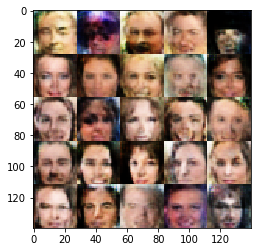

Epoch 1/1... Discriminator Loss: 2.1770... Generator Loss: 4.6835
Epoch 1/1... Discriminator Loss: 1.1397... Generator Loss: 1.6202
Epoch 1/1... Discriminator Loss: 1.2771... Generator Loss: 2.2299
Epoch 1/1... Discriminator Loss: 0.7493... Generator Loss: 3.0292
Epoch 1/1... Discriminator Loss: 0.7755... Generator Loss: 0.9450
Epoch 1/1... Discriminator Loss: 0.5268... Generator Loss: 1.2706
Epoch 1/1... Discriminator Loss: 0.2472... Generator Loss: 2.0029
Epoch 1/1... Discriminator Loss: 0.0902... Generator Loss: 3.5874
Epoch 1/1... Discriminator Loss: 0.2280... Generator Loss: 2.3444
Epoch 1/1... Discriminator Loss: 0.2989... Generator Loss: 1.9267


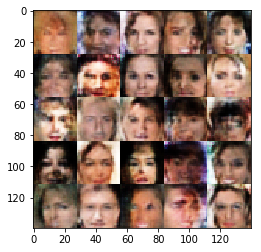

Epoch 1/1... Discriminator Loss: 0.8653... Generator Loss: 0.7585
Epoch 1/1... Discriminator Loss: 0.3574... Generator Loss: 1.6040
Epoch 1/1... Discriminator Loss: 0.2289... Generator Loss: 2.1383
Epoch 1/1... Discriminator Loss: 0.5262... Generator Loss: 1.2348
Epoch 1/1... Discriminator Loss: 0.5941... Generator Loss: 1.0994
Epoch 1/1... Discriminator Loss: 0.3571... Generator Loss: 1.8474
Epoch 1/1... Discriminator Loss: 0.4121... Generator Loss: 1.5584
Epoch 1/1... Discriminator Loss: 0.0380... Generator Loss: 4.7159
Epoch 1/1... Discriminator Loss: 0.6323... Generator Loss: 0.9862
Epoch 1/1... Discriminator Loss: 0.2475... Generator Loss: 1.9594


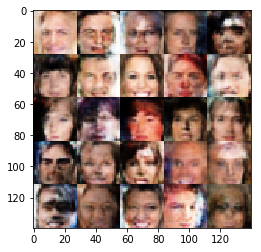

Epoch 1/1... Discriminator Loss: 0.2364... Generator Loss: 2.2195
Epoch 1/1... Discriminator Loss: 0.5654... Generator Loss: 1.2385
Epoch 1/1... Discriminator Loss: 0.1960... Generator Loss: 2.2929
Epoch 1/1... Discriminator Loss: 0.5740... Generator Loss: 1.0594
Epoch 1/1... Discriminator Loss: 1.5203... Generator Loss: 0.3744
Epoch 1/1... Discriminator Loss: 1.0438... Generator Loss: 0.6018
Epoch 1/1... Discriminator Loss: 0.4927... Generator Loss: 1.8728
Epoch 1/1... Discriminator Loss: 0.7115... Generator Loss: 0.9350
Epoch 1/1... Discriminator Loss: 0.6862... Generator Loss: 0.9161
Epoch 1/1... Discriminator Loss: 0.3616... Generator Loss: 2.8614


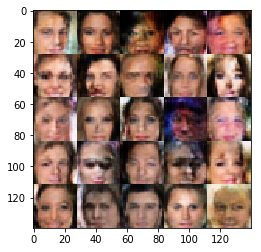

Epoch 1/1... Discriminator Loss: 0.2655... Generator Loss: 2.0259
Epoch 1/1... Discriminator Loss: 0.3036... Generator Loss: 2.0029
Epoch 1/1... Discriminator Loss: 0.5356... Generator Loss: 1.9143
Epoch 1/1... Discriminator Loss: 0.0402... Generator Loss: 4.4899
Epoch 1/1... Discriminator Loss: 0.1980... Generator Loss: 3.2550
Epoch 1/1... Discriminator Loss: 0.2587... Generator Loss: 2.4182
Epoch 1/1... Discriminator Loss: 0.1127... Generator Loss: 3.1156
Epoch 1/1... Discriminator Loss: 0.1517... Generator Loss: 2.6085
Epoch 1/1... Discriminator Loss: 0.3420... Generator Loss: 2.7702
Epoch 1/1... Discriminator Loss: 0.3656... Generator Loss: 1.6454


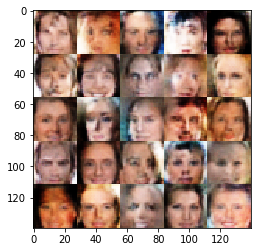

Epoch 1/1... Discriminator Loss: 0.3832... Generator Loss: 1.5225
Epoch 1/1... Discriminator Loss: 1.3775... Generator Loss: 4.0373
Epoch 1/1... Discriminator Loss: 0.7421... Generator Loss: 1.9119
Epoch 1/1... Discriminator Loss: 0.6805... Generator Loss: 1.0925
Epoch 1/1... Discriminator Loss: 0.5955... Generator Loss: 1.8706
Epoch 1/1... Discriminator Loss: 0.6175... Generator Loss: 1.2935


In [24]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.